# Exercício

1. Carregue o arquivo FakeTweetBr.csv em um dataframe df. 

2. Crie uma função que leia um texto, remova stop_words e pontuações, além de colocar todas as letras em caixa baixa. O resultado deve ser uma lista de contendo textos lematizados.

3. Processe a função descrita anteriormente na coluna $text$ no dataframe df. E verifique as palavras mais frequentes. Faça um  𝑏𝑎𝑟𝑝𝑙𝑜𝑡 contendo a frequência de cada palavra

4. Crie um $corpus$ textual através da coluna $text$ e represente, para cada texto, sua forma vetorial através dos métodos $\textit{Bag of Words}$, $\textit{TF-IDF}$ e mais dois outros métodos baseado em Deep Learning (obter no  $hugging face$). 

5. Para cada método, quais palavras são mais correlacionadas com a palavra $fake$? Faça um  𝑏𝑎𝑟𝑝𝑙𝑜𝑡 contendo a correlação de cada palavra com a palavra $fake$ em ordem descrecente.  

6. Crie uma arvore (ou floresta) que represente a similaridades entre os textos. A arvore deve ser oriunda de um grafo onde os textos são conectados pela similaridade do cosseno entre eles. Crie uma arvore para cada método.  

7. Baseado na questão anterior, responda: O $\textit{closeness centrality}$ entre os métodos são proporcionais? Crie um correlograma para evidenciar a correlação de Pearson entre as centralidades dos textos para cada método. 







In [ ]:
%pip install pandas matplotlib numpy seaborn scikit-learn tqdm netwulf spacy torch torchvision transformers ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!python -m spacy download pt_core_news_sm

Note: you may need to restart the kernel to use updated packages.
zsh:1: command not found: python


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import string 
from tqdm import tqdm

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
from tqdm import tqdm

In [4]:
pln=spacy.load("pt_core_news_sm")
stop_words=STOP_WORDS
pontuacoes=string.punctuation
pontuacoes=pontuacoes+"..."+' '

In [5]:
def processamento(texto):
    texto=texto.lower()
    documento=pln(texto)
    lista1=[]
    for p in documento :
        #lista.append(p)
        lista1.append(p.lemma_)#lematização
    lista2=[]
    for p in lista1:
        if (p in stop_words)==False:
            lista2.append(p)
    lista3=[]
    for p in lista2:
        if (p in pontuacoes)==False:
            lista3.append(p)
            
        
    return lista3

In [6]:
df=pd.read_csv('FakeTweetBr.csv')

In [7]:
df

,Unnamed: 0,id,subject,text,classificacao,date,retweets,favorites,permalink
0,0,1.124513e+18,macaco marielle,Marielle >BANDIDOS Narco-traficantes-Milícias ...,fake,2019-05-04 0:16,0,0,https://twitter.com/MRTT_/status/1124513050218...
1,1,1.124049e+18,macaco marielle,"Bem, as últimas noticias a respeito disso que ...",fake,2019-05-02 17:33,0,0,https://twitter.com/EvaristoKlebber/status/112...
2,5,1.119295e+18,macaco marielle,@jornalnacional convivi com notícias da Mariel...,fake,2019-04-19 14:41,0,0,https://twitter.com/luiztemper/status/11192950...
3,10,1.114583e+18,macaco marielle,"O Cesari Battisti confessou seus crimes, a esq...",fake,2019-04-06 14:36,0,0,https://twitter.com/GrimoaldoL/status/11145825...
4,11,1.113246e+18,macaco marielle,[Agência Lupa] Verificamos: É falso que Thiago...,true,2019-04-02 22:04,1,0,https://twitter.com/antmarobel/status/11132459...
...,...,...,...,...,...,...,...,...,...
274,1345,1.118650e+18,jair time personalidade,"Por “ruptura com a corrupção”, apenas um brasi...",fake,2019-04-17 20:00,0,0,https://twitter.com/kohavitt/status/1118650345...
275,1405,1.090221e+18,jair time personalidade,"Pessoal, a revista americana TIME incluiu Jair...",fake,2019-01-29 9:10,2,1,https://twitter.com/alcamorim/status/109022062...
276,1480,1.073590e+18,jair time personalidade,QUE COMECE O MIMIMI DOS BOLSOBURROS. Jair Bols...,true,2018-12-14 11:47,0,1,https://twitter.com/jorgetemer/status/10735903...
277,1499,1.072787e+18,jair time personalidade,Circula nas redes sociais uma foto da capa da ...,true,2018-12-12 6:37,0,1,https://twitter.com/juidsonjoc/status/10727874...


3. Processe a função descrita anteriormente na coluna $text$ no dataframe df. E verifique as palavras mais frequentes. Faça um  𝑏𝑎𝑟𝑝𝑙𝑜𝑡 contendo a frequência de cada palavra

In [8]:
textoall=pd.Series(df['text'].dropna().values).apply(processamento)
textoall

0      [marielle, bandido, narco-traficantes-milícia,...
1      [noticia, respeito, de isso, verdadeiro, assas...
2      [@jornalnacional, convivi, notícia, de o, mari...
3      [Cesari, battisti, confessar, crime, esquerda,...
4      [agência, lupo, verificar, falso, thiago, maca...
                             ...                        
274    [“, ruptura, corrupção, ”, brasileiro, aparece...
275    [pessoal, revista, americano, time, incluir, j...
276    [começar, mimimi, de o, bolsoburro, jair, Bols...
277    [circular, em o, rede, social, foto, de o, cap...
278    [circular, por o, rede, social, publicação, af...
Length: 279, dtype: object

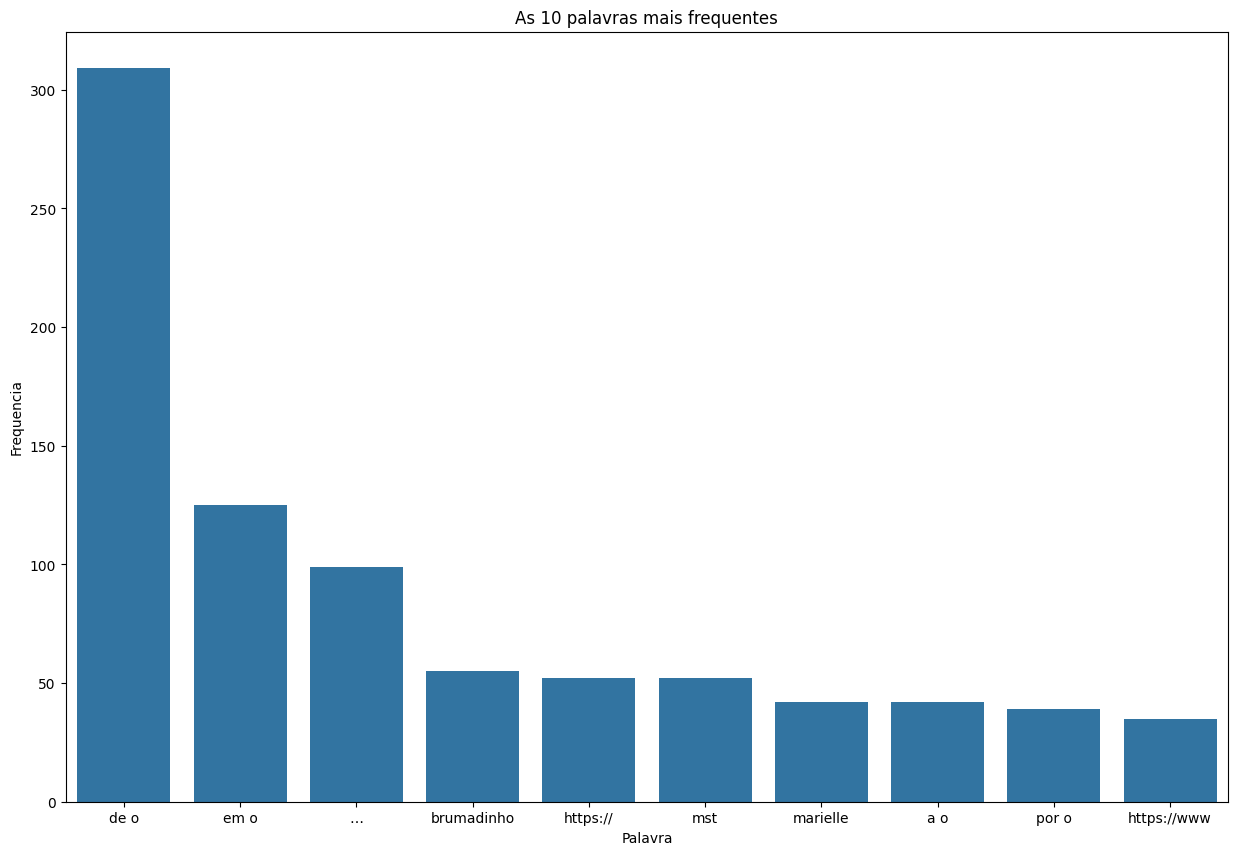

In [9]:
from collections import Counter

lista_palavras=[]
for i in textoall:
    for j in i:
        lista_palavras.append(j)
        
frequencia=Counter(lista_palavras)

df_frequencia=pd.DataFrame(frequencia.items(),columns=['Palavra','Frequencia'])

df_frequencia=df_frequencia.sort_values(by='Frequencia',ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x='Palavra',y='Frequencia',data=df_frequencia.head(10))
plt.title('As 10 palavras mais frequentes')
plt.show()

4. Crie um $corpus$ textual através da coluna $text$ e represente, para cada texto, sua forma vetorial através dos métodos $\textit{Bag of Words}$, $\textit{TF-IDF}$ e mais dois outros métodos baseado em Deep Learning (obter no  $hugging face$). 

In [10]:
corpus=textoall.apply(lambda x: ' '.join(x))
corpus

0      marielle bandido narco-traficantes-milícia pis...
1      noticia respeito de isso verdadeiro assassino ...
2      @jornalnacional convivi notícia de o marielle ...
3      Cesari battisti confessar crime esquerda calar...
4      agência lupo verificar falso thiago macaco ide...
                             ...                        
274    “ ruptura corrupção ” brasileiro aparecer ‘ 10...
275    pessoal revista americano time incluir jair bo...
276    começar mimimi de o bolsoburro jair Bolsonaro ...
277    circular em o rede social foto de o capa de o ...
278    circular por o rede social publicação afirmar ...
Length: 279, dtype: object

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Bag of Words
cv=CountVectorizer(tokenizer=processamento,stop_words=None,token_pattern=None)
X_bow=cv.fit_transform(corpus)
X_bow.toarray()

vocabularioBow=cv.get_feature_names_out()
vocabularioBow

array(['):', '-30', '-sérgio', ..., '“', '”', '…'], dtype=object)

In [52]:

#TF-IDF
tfidf=TfidfVectorizer(tokenizer=processamento,stop_words=None,token_pattern=None)
X_tfidf=tfidf.fit_transform(corpus)
X_tfidf.toarray()

vocabularioTfidf=tfidf.get_feature_names_out()
vocabularioTfidf

array(['):', '-30', '-sérgio', ..., '“', '”', '…'], dtype=object)

In [53]:
Y=df['classificacao'].apply(lambda x: 1 if x=='fake' else 0)
Y

0      1
1      1
2      1
3      1
4      0
      ..
274    1
275    1
276    0
277    0
278    0
Name: classificacao, Length: 279, dtype: int64

In [15]:
# from transformers import BertTokenizer, BertModel

# tokenizerBert=BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
# modelBert=BertModel.from_pretrained('neuralmind/bert-base-portuguese-cased')

# tokensBert=tokenizerBert(corpus,return_tensors='pt',padding=True,truncation=True)
# outputBert=modelBert(**tokensBert)
# outputBert.last_hidden_state

In [16]:
# from transformers import AutoTokenizer, AutoModel

# model_name = "tubyneto/bertimbau"

# tokenizerBertimbau = AutoTokenizer.from_pretrained(model_name)
# modelBertimbau = AutoModel.from_pretrained(model_name)

# tokensBertimbau = tokenizerBertimbau(corpus, return_tensors='pt', padding=True, truncation=True)
# outputBertimbau = modelBertimbau(**tokensBertimbau)
# outputBertimbau.last_hidden_state



5. Para cada método, quais palavras são mais correlacionadas com a palavra $fake$? Faça um  𝑏𝑎𝑟𝑝𝑙𝑜𝑡 contendo a correlação de cada palavra com a palavra $fake$ em ordem descrecente.  

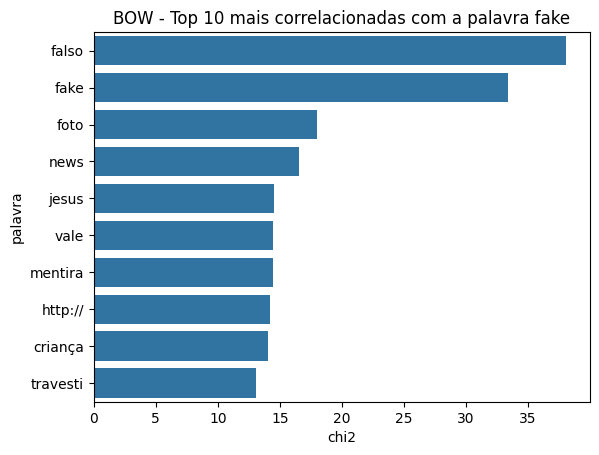

In [54]:
# 5. Para cada método, quais palavras são mais correlacionadas com a palavra $fake$? Faça um  𝑏𝑎𝑟𝑝𝑙𝑜𝑡 contendo a correlação de cada palavra com a palavra $fake$ em ordem descrecente.  
from sklearn.feature_selection import chi2

chi2score=chi2(X_bow,Y)[0]

df_chi2=pd.DataFrame(chi2score,columns=['chi2'])
df_chi2['palavra']=cv.get_feature_names_out()
df_chi2=df_chi2.sort_values(by='chi2',ascending=False)

sns.barplot(x='chi2',y='palavra',data=df_chi2.head(10))
plt.title('BOW - Top 10 mais correlacionadas com a palavra fake')
plt.show()


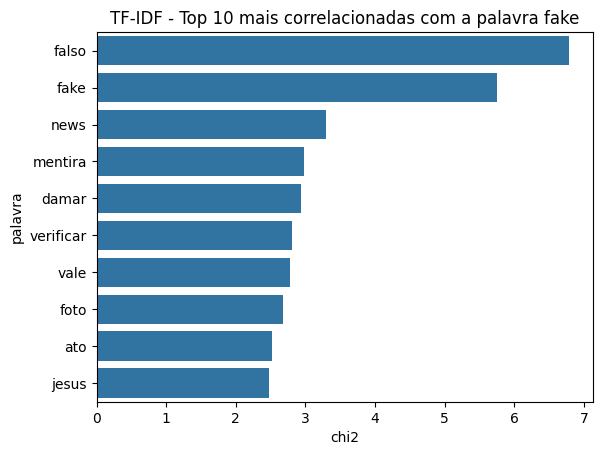

In [55]:
chi2score = chi2(X_tfidf, Y)[0]

df_chi2 = pd.DataFrame(chi2score, columns=['chi2'])
df_chi2['palavra'] = tfidf.get_feature_names_out()
df_chi2 = df_chi2.sort_values(by='chi2', ascending=False)

# plt.figure(figsize=(15,10))
sns.barplot(x='chi2', y='palavra', data=df_chi2.head(10))
plt.title('TF-IDF - Top 10 mais correlacionadas com a palavra fake')
plt.show()

6. Crie uma arvore (ou floresta) que represente a similaridades entre os textos. A arvore deve ser oriunda de um grafo onde os textos são conectados pela similaridade do cosseno entre eles. Crie uma arvore para cada método.  

In [ ]:
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity

def create_source_target_weight(corpus, vectors):
    source = []
    target = []
    weight = []
    nn = len(corpus)
    for i in tqdm(range(nn-1)):
        for j in range(i+1, nn):
            text1 = corpus[i]
            text2 = corpus[j]
            vector1 = vectors[i]
            vector2 = vectors[j]
            cosine = cosine_similarity(vector1.reshape(
                1, -1), vector2.reshape(1, -1))[0][0]
            source.append(text1)
            target.append(text2)
            weight.append(cosine)
    return source, target, weight


def create_edges(source, target, weight):
    dd = pd.DataFrame({'ORIGEM': source, 'DESTINO': target, 'W': weight})
    return nx.from_pandas_edgelist(dd, 'ORIGEM', 'DESTINO', 'W')


def create_tree(sourceIn, targetIn, weightIn):
    G = create_edges(sourceIn, targetIn, weightIn)
    dtree=pd.DataFrame({'ORIGEM':sourceIn,'DESTINO':targetIn,'W':weightIn})
    source = []
    target = []
    weight = []

    for a, b in tqdm(nx.maximum_spanning_tree(G, weight='W', algorithm='kruskal').edges):
        weight.append(dtree[(dtree['ORIGEM'] == a) & (
            dtree['DESTINO'] == b)].W.values[0])
        source.append(a)
        target.append(b)

    dtAux = pd.DataFrame({'ORIGEM': source, 'DESTINO': target, 'W': weight})
    return nx.from_pandas_edgelist(dtAux, 'ORIGEM', 'DESTINO', 'W')

In [ ]:
corpus_unique=list(pd.Series(corpus).unique())

In [120]:
import netwulf as nw

vetores_bow=cv.fit_transform(corpus_unique).toarray()
source, target, weight = create_source_target_weight(corpus_unique, vetores_bow)

100%|██████████| 277/277 [00:05<00:00, 50.44it/s] 


In [121]:
Gtree = create_tree(source, target, weight)
nw.visualize(Gtree)

100%|██████████| 277/277 [00:00<00:00, 352.43it/s]
/opt/homebrew/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


(None, None)

In [122]:
vetores_tfidf=tfidf.fit_transform(corpus_unique).toarray()
source, target, weight = create_source_target_weight(corpus_unique, vetores_tfidf)

Gtree = create_tree(source, target, weight)
nw.visualize(Gtree)

100%|██████████| 277/277 [00:00<00:00, 351.63it/s]
/opt/homebrew/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


(None, None)

7. Baseado na questão anterior, responda: O $\textit{closeness centrality}$ entre os métodos são proporcionais? Crie um correlograma para evidenciar a correlação de Pearson entre as centralidades dos textos para cada método. 

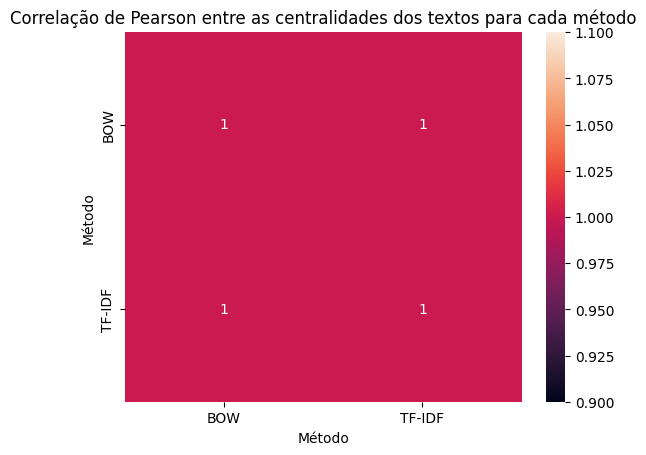

In [127]:
# 7. Baseado na questão anterior, responda: O $\textit{closeness centrality}$ entre os métodos são proporcionais? Crie um correlograma para evidenciar a correlação de Pearson entre as centralidades dos textos para cada método. 

def closeness_centrality(G):
    return nx.closeness_centrality(G)

def create_centrality_df(G):
    cc = closeness_centrality(G)
    return pd.DataFrame(cc.items(), columns=['Texto', 'Closeness'])

df_centrality_bow = create_centrality_df(Gtree)
df_centrality_bow['Método'] = 'BOW'

df_centrality_tfidf = create_centrality_df(Gtree)
df_centrality_tfidf['Método'] = 'TF-IDF'

df_centrality = pd.concat([df_centrality_bow, df_centrality_tfidf])

sns.heatmap(df_centrality.pivot(index='Texto', columns='Método', values='Closeness').corr(), annot=True)
plt.title('Correlação de Pearson entre as centralidades dos textos para cada método')
plt.show()